In [88]:
import pandas as pd
from sklearn import metrics
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

%matplotlib inline
sns.set_style('whitegrid')

In [76]:
train=pd.read_csv("problem_2_train.csv")
test=pd.read_csv("problem_2_test.csv")
train.corr()

,srno,hubid,hubpincode,pickuppartnerid,deliverypartnerid,insuranceCompanyId,custpincode,servicecntrid,tat_in_days
srno,1.000000,0.277127,-0.026209,0.082192,0.011729,0.039475,-0.011257,0.125644,-0.193610
hubid,0.277127,1.000000,-0.055715,0.033957,-0.001304,-0.151538,-0.022918,0.451190,-0.121613
hubpincode,-0.026209,-0.055715,1.000000,-0.028212,-0.020470,-0.088960,0.926211,0.201244,-0.001505
pickuppartnerid,0.082192,0.033957,-0.028212,1.000000,0.243320,0.088534,-0.053867,0.039964,-0.085485
deliverypartnerid,0.011729,-0.001304,-0.020470,0.243320,1.000000,0.020992,-0.029602,0.018962,-0.072986
insuranceCompanyId,0.039475,-0.151538,-0.088960,0.088534,0.020992,1.000000,-0.094457,-0.139533,-0.033617
custpincode,-0.011257,-0.022918,0.926211,-0.053867,-0.029602,-0.094457,1.000000,0.207607,0.048805
servicecntrid,0.125644,0.451190,0.201244,0.039964,0.018962,-0.139533,0.207607,1.000000,-0.169008
tat_in_days,-0.193610,-0.121613,-0.001505,-0.085485,-0.072986,-0.033617,0.048805,-0.169008,1.000000


# Data cleaning 

In [77]:
labelencoder_X=LabelEncoder()
train['mobmake']=labelencoder_X.fit_transform(train['mobmake'])
oneHotEncoder=OneHotEncoder(categorical_features=['mobmake']) 

labelencoder_X=LabelEncoder()
train['custpincodecategory']=labelencoder_X.fit_transform(train['custpincodecategory'])
oneHotEncoder=OneHotEncoder(categorical_features=['custpincodecategory']) 

labelencoder_X=LabelEncoder()
train['claimtype']=labelencoder_X.fit_transform(train['claimtype'])
oneHotEncoder=OneHotEncoder(categorical_features=['claimtype']) 

labelencoder_X=LabelEncoder()
test['mobmake']=labelencoder_X.fit_transform(test['mobmake'])
oneHotEncoder=OneHotEncoder(categorical_features=['mobmake']) 

labelencoder_X=LabelEncoder()
test['custpincodecategory']=labelencoder_X.fit_transform(test['custpincodecategory'])
oneHotEncoder=OneHotEncoder(categorical_features=['custpincodecategory']) 

labelencoder_X=LabelEncoder()
test['claimtype']=labelencoder_X.fit_transform(test['claimtype'])
oneHotEncoder=OneHotEncoder(categorical_features=['claimtype']) 

test.dtypes

srno                    int64
mobmake                 int64
hubid                   int64
hubpincode              int64
pickuppartnerid         int64
deliverypartnerid       int64
insuranceCompanyId      int64
custpincodecategory     int64
claimtype               int64
custpincode             int64
memcreateddate         object
mobilepurchasedate     object
claimintdate           object
servicecntrid           int64
pickupStartdate        object
dtype: object

In [36]:
# train['memcreateddate'] = pd.to_datetime(train.memcreateddate)
# train['memcreatemonth'] = train['memcreateddate'].apply(lambda x: x.month)

# train['mobilepurchasedate'] = pd.to_datetime(train.mobilepurchasedate)
# train['mobilepurchasemonth'] = train['mobilepurchasedate'].apply(lambda x: x.month)

# train['claimintdate'] = pd.to_datetime(train.claimintdate)
# train['claimintmonth'] = train['claimintdate'].apply(lambda x: x.month)

# train['pickupStartdate'] = pd.to_datetime(train.pickupStartdate)
# train['pickupStartmonth'] = train['pickupStartdate'].apply(lambda x: x.month)

# train.drop(columns=['memcreateddate', 'mobilepurchasedate', 'claimintdate', 'pickupStartdate'], inplace=True)

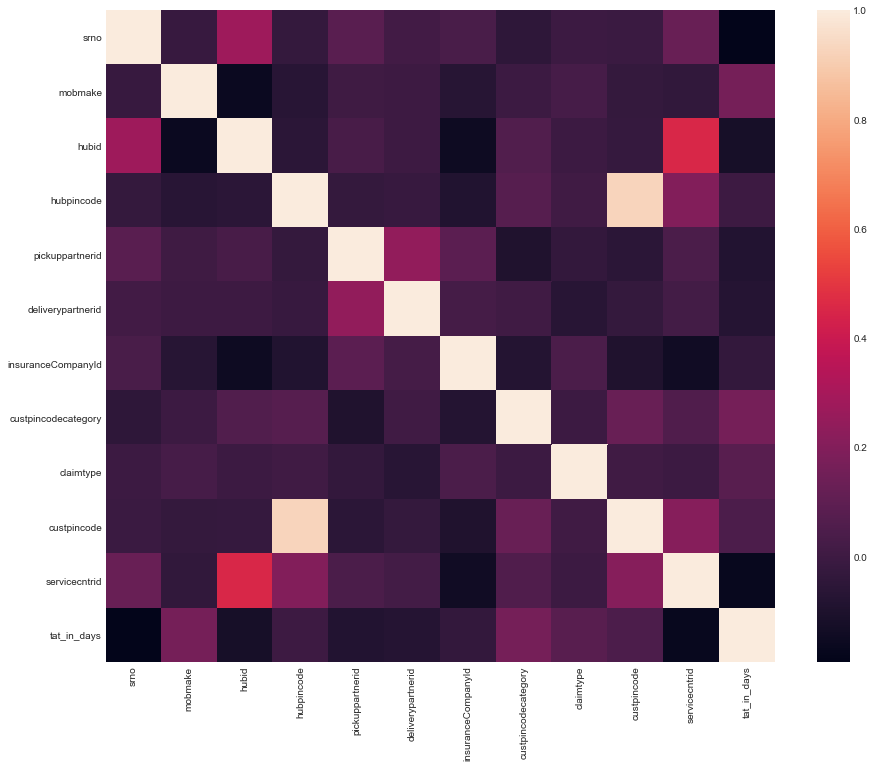

In [72]:
plt.figure(figsize=(15,12))
sns.heatmap(train.corr())

In [79]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train[['hubid', 'hubpincode', 'pickuppartnerid','deliverypartnerid', 'insuranceCompanyId', 'custpincode','servicecntrid']] = scaler.fit_transform(train[['hubid', 'hubpincode', 'pickuppartnerid','deliverypartnerid', 'insuranceCompanyId', 'custpincode','servicecntrid']])

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
test[['hubid', 'hubpincode', 'pickuppartnerid','deliverypartnerid', 'insuranceCompanyId', 'custpincode','servicecntrid']] = scaler.fit_transform(test[['hubid', 'hubpincode', 'pickuppartnerid','deliverypartnerid', 'insuranceCompanyId', 'custpincode','servicecntrid']])

In [46]:
train.head()
# train.info()

,srno,mobmake,hubid,hubpincode,pickuppartnerid,deliverypartnerid,insuranceCompanyId,custpincodecategory,claimtype,custpincode,memcreateddate,mobilepurchasedate,claimintdate,servicecntrid,pickupStartdate,tat_in_days
0,2851218,12,0.259259,0.625004,0.756494,0.95102,0.0,1,0,0.584723,2017-04-27,2016-12-02,2018-02-08,0.347100,2018-02-13,5
1,2838330,8,0.370370,0.282512,0.756494,0.95102,0.0,1,0,0.264320,2017-03-06,2017-03-05,2018-02-04,0.383128,2018-02-08,12
2,2835781,8,0.074074,0.137522,0.756494,0.95102,1.0,1,0,0.128660,2018-02-01,2018-01-27,2018-02-03,0.333919,2018-02-12,9
3,2838589,11,0.074074,0.137522,0.756494,0.95102,1.0,2,0,0.145012,2018-01-17,2018-01-31,2018-02-04,0.073814,2018-02-14,9
4,2855214,12,0.777778,0.137519,0.756494,0.95102,0.0,1,0,0.235410,2018-01-23,2018-01-20,2018-02-09,0.502636,2018-02-14,8


In [48]:
feature_cols=['srno','mobmake','hubid','hubpincode','pickuppartnerid','deliverypartnerid','insuranceCompanyId','custpincodecategory','claimtype','custpincode','servicecntrid']
x=train[feature_cols]

In [49]:
y=train['tat_in_days']
y.head()

0     5
1    12
2     9
3     9
4     8
Name: tat_in_days, dtype: int64

In [50]:
x_train, x_test, y_train, y_test = train_test_split(x, y,random_state=1)

# Using linear Regression

In [51]:
linreg=LinearRegression()
linreg.fit(x_train,y_train)
list(zip(feature_cols,linreg.coef_))
y_pred=linreg.predict(x_test)
np.sqrt(metrics.mean_squared_error(y_test,y_pred))

4.962035663396029

# Using Gradient Boosting Regressor

In [63]:
from sklearn.ensemble import GradientBoostingRegressor
gbrt=GradientBoostingRegressor(n_estimators=600)
gbrt.fit(x_train, y_train)
y_pred=gbrt.predict(x_test)
y_pred=np.sqrt(metrics.mean_squared_error(y_test,y_pred) )

4.381108475375515

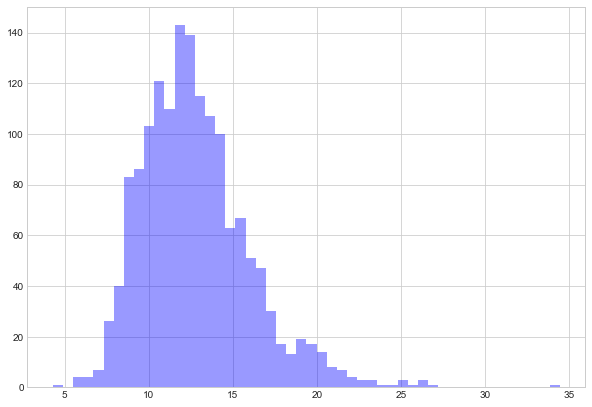

In [73]:
plt.figure(figsize=(10,7))
sns.distplot(y_pred, kde=False, bins=50, color='blue')

In [85]:
feature_cols=['srno','mobmake','hubid','hubpincode','pickuppartnerid','deliverypartnerid','insuranceCompanyId','custpincodecategory','claimtype','custpincode','servicecntrid']
x1=train[feature_cols]

x2=test[feature_cols]

In [84]:
y1=train['tat_in_days']
y1.head()

0     5
1    12
2     9
3     9
4     8
Name: tat_in_days, dtype: int64

In [87]:
from sklearn.ensemble import GradientBoostingRegressor
gbrt=GradientBoostingRegressor(n_estimators=600)
gbrt.fit(x1, y1)
y_pred=gbrt.predict(x2)
y_pred

array([10.32223123, 13.480585  , 14.59738199, ..., 16.45904455,
       14.31660217, 15.61408069])

In [90]:
test['prediction']=y_pred
test.head()

,srno,mobmake,hubid,hubpincode,pickuppartnerid,deliverypartnerid,insuranceCompanyId,custpincodecategory,claimtype,custpincode,memcreateddate,mobilepurchasedate,claimintdate,servicecntrid,pickupStartdate,prediction
0,2829088,13,0.076923,0.652181,0.756494,0.95102,0.0,1,0,0.654998,2017-07-30,2017-07-27,2018-02-01,0.403339,2018-02-06,10.322231
1,2829866,10,0.038462,0.000004,0.756494,0.95102,1.0,1,0,0.128679,2017-07-17,2017-01-25,2018-02-01,0.333919,2018-02-08,13.480585
2,2894489,10,0.076923,0.652181,0.756494,0.95102,1.0,3,0,0.689989,2018-01-12,2018-01-11,2018-02-21,0.397188,2018-02-28,14.597382
3,2876708,10,0.038462,0.000004,0.756494,0.95102,1.0,2,0,0.292490,2017-08-07,2017-05-21,2018-02-16,0.333919,2018-02-26,17.138081
4,2890283,13,0.807692,0.420427,0.756494,0.95102,0.0,3,0,0.580046,2017-11-10,2017-09-22,2018-02-20,0.503515,2018-02-23,16.493416


In [92]:
export_csv = test.to_csv (r'C:\Users\Ravneet\Desktop\Data Analysis and Visualisation\Assignment 2\problem_2\AnswerProblem2.csv', index = None, header=True)